In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

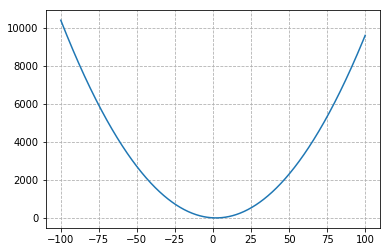

In [2]:
def f(x):
    return (x-2)**2 + 1

x = np.linspace(-100,100,1000)
y = [f(xi) for xi in x]

plt.plot(x,y)
plt.grid(ls='--')

2) If we start at $x=4$, which way should we move and why?

###### negative, minimum is at 2 and at x=4 slope is positive

3) If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

$$x_{n+1} = x_n + (-\frac{slope}{|slope|}) * stepsize$$

4) Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

[4.0, 2.8999999999999999, 1.7999999999999998, 2.8999999999999999, 1.7999999999999998, 2.8999999999999999, 1.7999999999999998, 2.8999999999999999, 1.7999999999999998, 2.8999999999999999]


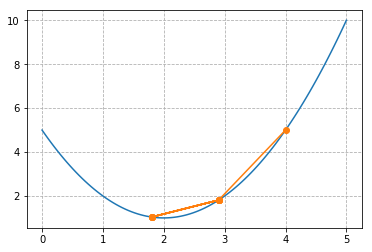

In [3]:
def df(x):
    return 2*(x-2)

start = 4.
steps = 1.1
tx = []
ty = []
for i in range(10):
    tx.append(start)
    ty.append(f(start))
    start = start + (-df(start)/np.abs(df(start)))*steps
    
xs = np.linspace(0,5,100)
    
plt.plot(xs,[f(x) for x in xs]) 
plt.plot(tx,ty,'o-')
plt.grid(ls='--')
print(tx)


5) Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

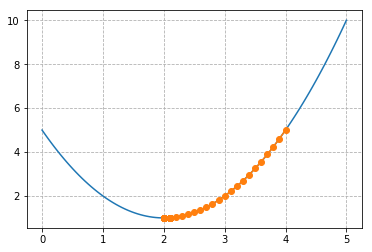

In [4]:
def guess(n,s,x=4.):
    start = x
    steps = s
    tx = []
    ty = []
    for i in range(n):
        tx.append(start)
        ty.append(f(start))
        start = start + (-df(start)/np.abs(df(start)))*steps
    return (tx,ty)

g = guess(100,0.1)

plt.plot(xs,[f(x) for x in xs])
plt.plot(g[0],g[1],'o-')
plt.grid(ls='--')

6) When do we want the step size to be small and when do you want the step size to be big?

###### Big when large from answer, small when small from answer

7) What function kind of does that?

slope

8) If we use that function, what does the update rule looks like.

$$
x_{n+1} = x_n - \lambda * slope
$$

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

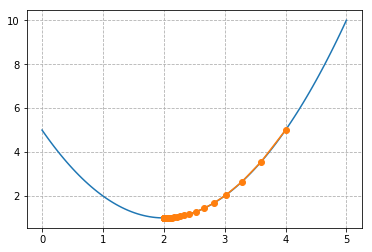

In [6]:
def guess(lmd,n,x=4.):
    start = x
    tx = []
    ty = []
    for i in range(n):
        tx.append(start)
        ty.append(f(start))
        start = start - lmd*df(start)
    return (tx,ty)

g = guess(0.1,100)

plt.plot(xs,[f(x) for x in xs])
plt.plot(g[0],g[1],'o-')
plt.grid(ls='--')

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

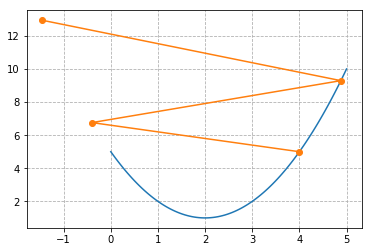

In [7]:
g = guess(1.1,4)
plt.plot(xs,[f(x) for x in xs])
plt.plot(g[0],g[1],'o-')
plt.grid(ls='--')

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + 2y^2 + 1$$
Make the 3D plot.

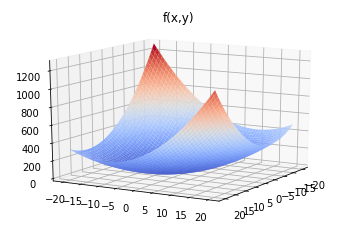

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

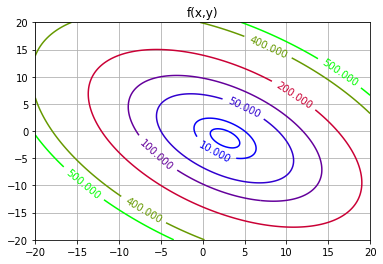

In [69]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

###### middle, (2.5,-2.5) approximately

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

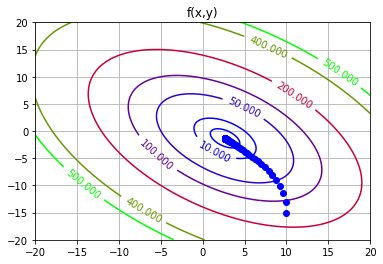

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

In [ ]:
v = v - lmd*gradient(v)

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

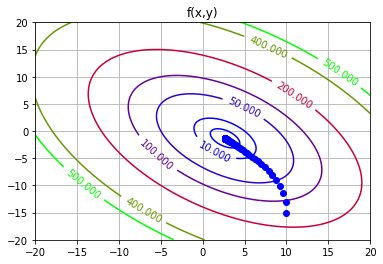

In [78]:
def gradient(vector):
    x,y = vector
    return np.array([2*(x-2)+y,x+2*y])

x = np.array([10,-15])
lmd = 0.1
plt.plot(x[0],x[1],'ob')
for i in range(100):
    x = x - lmd*gradient(x)
    plt.plot(x[0],x[1],'ob')
    
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

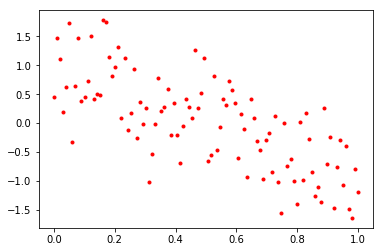

In [43]:
np.random.seed(123)
n = 100
xs = np.linspace(0,1,n)
ys = -2*x + 1 + np.random.randn(n)/2
plt.plot(xs,ys,'.r')

1) What exactly are we trying to minimize and why?

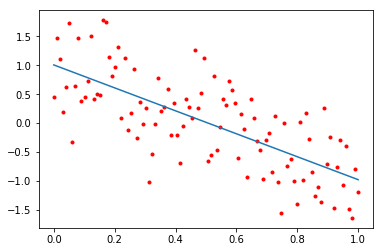

In [47]:
#minimize cost function
def cost(mc):
    m,c = mc
    return sum((m*xs+c-ys)**2)

def gradf(mc):
    h = 1e-4
    dx = ( cost(mc+[h,0]) - cost(mc-[h,0]) )/(2*h)
    dy = ( cost(mc+[0,h]) - cost(mc-[0,h]) )/(2*h)
    return np.array([dx,dy])

def descent(v,lmd=0.1,n=10000):
    for i in range(n):
        v = v-lmd*gradf(v)
    return v

#v=[m,c]
v = descent(np.array([0.,1.]),0.001)
line = [v[0]*xx + v[1] for xx in xs]
plt.plot(xs,ys,'.r')
plt.plot(xs,line)

2) Minimize and Visualize it.

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [24]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

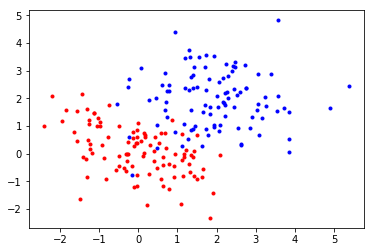

In [25]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?

2) What equation do we plot?

In [28]:
#y = m*x+c

3) Minimize and plot it to see that you get the right line.

In [26]:
#this is how you make a padded array
nr, nc = d.shape
pd = np.zeros((nr,nc+1))
pd[:,1:] = d
pd[:,0] =  1.0
print (pd[:20])

[[ 1.         -1.23086966  0.18731902]
 [ 1.          0.15690022  0.76467807]
 [ 1.         -1.48876741 -1.64011723]
 [ 1.          1.30714602 -0.37248023]
 [ 1.          0.67461839  0.75059711]
 [ 1.          0.94584269 -0.01901824]
 [ 1.          1.65971858 -0.56346172]
 [ 1.          1.91304992 -1.43409072]
 [ 1.         -1.25215912  1.07673845]
 [ 1.         -0.37260327 -0.51585145]
 [ 1.          0.71465901  0.19371616]
 [ 1.         -0.10270834 -1.22090529]
 [ 1.         -1.30358744  1.60276889]
 [ 1.          0.42723536  0.61684556]
 [ 1.         -0.2558605   0.00338542]
 [ 1.         -0.48066857  0.98644225]
 [ 1.         -0.2691181   0.41096303]
 [ 1.          1.3099536  -0.67015697]
 [ 1.          0.28005885 -0.74420921]
 [ 1.          1.34634767 -0.03558485]]
